# Lesson 26 - Introduction to Scikit-Learn

### The following topics are discussed in this notebook:
* Splitting data into training, validation, and test sets. 
* Building supervising learning models in Scikit-Learn. 
* Scoring and comparing supervising learning models. 

## Scikit-Learn

The most popular Python library for machine learning is the Scikit-Learn (`sklearn`) package. This package provides functions for creating supervised learning models, as well as for performing unsupervised learning tasks. Scikit-Learn also provides tools for working with and preparing data for use in creating models. 

The tools provided by Scikit-Learn are arranged into various modules. We will typically not import the entire package, but will instead import the required tools as needed. 

We will illustrate the use of Scikit-Learn, as well as some general concepts relating to supervised learning, by walking through a simple example of a classification task. In this example, we will be working with three different classification algorithms: **logistic regression**, **decision trees**, and **random forests**. We will discuss how to use Scikit-Learn to create models of each of these types, but we will not be going deep into exactly how each of these algorithms work in this lesson. We will discuss the details of these algorithms in later lessons. 

## Load Packages

We will begin by loading three packages: Numpy, Pandas, and Matplotlib.

In [1]:
import numpy as np               
import pandas as pd              
import matplotlib.pyplot as plt  

## Iris Dataset

For this example, we will be working with the Iris Dataset. This data set is a real-world "toy" dataset that is often used to demonstrate concepts in data science. The iris dataset contains information about several flowers selected from three different species of iris: versicolor, setosa, and virginica. 

For each flower, we have five pieces of information:
* The sepal length of the flower. 
* The sepal width of the flower. 
* The petal length of the flower.
* The petal width of the flower. 
* The species of the flower. 

The original iris dataset contains 150 observations. We will be working with a modified version of this dataset that contains 600 observations. The extra 450 observations were randomly generated to be similar to existing observations. 

![](images2/iris.png)

## Load and Explore Data

The data is stored in the tab-separated file `data/iris_mod.txt`. We will use Pandas to load the data into a DataFrame called `iris`. We will then look at the first 10 observations in the DataFrame.

In [2]:
iris = pd.read_csv('data/iris_mod.txt', sep='\t')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.8,3.7,6.1,2.5,virginica
1,6.8,3.0,5.5,2.1,virginica
2,5.9,3.2,5.4,2.2,virginica
3,6.5,3.4,6.0,2.0,virginica
4,6.2,3.0,4.3,1.3,versicolor
5,6.5,3.2,4.9,1.6,versicolor
6,4.7,3.5,1.0,0.2,setosa
7,5.2,3.8,1.5,0.3,setosa
8,5.0,3.4,1.3,0.2,setosa
9,6.6,3.0,5.1,2.0,virginica


We can use the Seaborn package to create a pairs plot of the the dataset. 

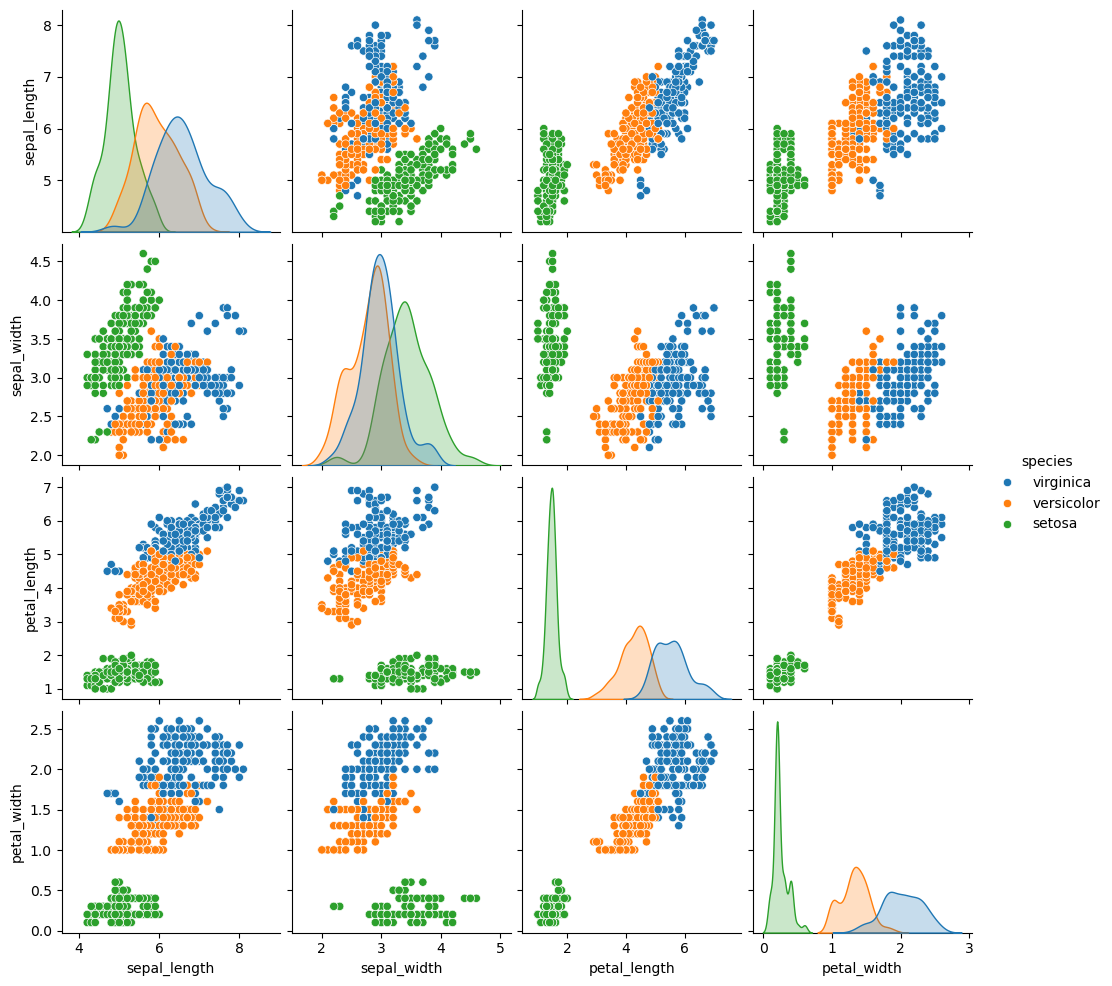

In [3]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.pairplot(iris, hue="species")
plt.show()

## The Goal

Our goal is to build a model that will allow us to predict the species of a newly observed flower for which we have measurements for sepal length, sepal width, petal length, and petal width. In the language of supervised learning, this means that we will be treating the flower species as the label on our model, while the other four variables will serve as our features. 

We will consider three different models: a logistic regression model, a decision tree model, and a random forest model. We will use the package Scikit-Learn to construct, assess, and apply both of these models. Before building any models, we need to put our data into a format that is ready to be used by the Scikit-Learn API. 

## Prepare the Data

The Scikit-Learn model-building API requires our data to be in a specific format. In particular, the features should be represented numerically, and contained in a DataFrame or 2D Numpy Array, while the labels should be contained in a list, series, or 1D Numpy array. 

In the next cell, we create a feature array called `X`, as well as a label array called `y`. 

In [4]:
X = iris.iloc[:,:4].values
y = iris.iloc[:,4].values

print('Type of X: ', type(X))
print('Type of y: ', type(y))

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Type of X:  <class 'numpy.ndarray'>
Type of y:  <class 'numpy.ndarray'>
Shape of X: (600, 4)
Shape of y: (600,)


## Splitting the Data into Training, Validation, and Test Sets

When creating a supervised learning model, it is important to evaluate the model's performance. For a classification model, for example, we might want to measure the model's **accuracy**, or in other words, the proportion of observations for which the model makes correct predictions. 

Some supervised learning models are very good at "remembering" the data on which they are trained. Such a model might perform very well when evaluated on this data, while performing very poorly on new data that it did not see during training. This phenomenon is called **overfitting**. An overfit model performs unreasonably well on the training data, but will not generalize well to new observations. 

For this reason, it is important to evaluate your model using **out-of-sample data**, or in other words, using data that your model did not see during training. One common method for estimating a model's out-of-sample performance is to split the data into three sets: the **training set**, the **validation set**, and the **testing set**. The purpose of each of these sets are described below:

* The **training set** is used to train any models that we create. We will provide the training set to a machine learning algorithm as input, and the algorithm will generate a model as its output. 

* The **validation set** is out-of-sample data used to compare the models we have created. We will often wish to consider multiple different learning algorithms in a supervised learning task. Each algorithm will produce a single model that has been trained on the training set, and we will then compare the performance of the resulting models on the (previously unseen) validation set to help us select our final model. 

* The **testing set** is out-of-sample data that is used to assess the performance of our final model. This set is used only once, at the very end of the model building process. 

## Size of Training, Validation, and Test Sets

There is no set rule for how many observations should go into each of these sets, but there are two guiding principles to follow: You want to include as many observations as possible in the training set, but you don't want the validation or testing sets to be too small to give you reasonable estimates of the out-of-sample performance. If the data set is fairly large, you might use 80% of it for training, 10% for validation, and 10% for testing. This is referred to as an 80/10/10 split. In a small dataset, an 80/10/10 split might create validation and testing sets that are too small. In these cases, you might consider a 60/20/20 split, or a 40/30/30 split. 

## Using Scikit-Learn to Split Data

When splitting your data into training, validation, and testing sets, it is import to first randomly shuffle the observations in your data. We could do this manually, but fortunately Scikit-Learn provides a function called `train_test_split` for splitting datasets. This function is found in the module `sklearn.model_selection`.

In [6]:
from sklearn.model_selection import train_test_split

 Each call to `train_test_split` will split a dataset into two subsets, which we will nominally refer to as the training and test sets. There are 5 parameters that we will typically provide when calling `train_test_split`:

* **`X`** - This should be a 2D NumPy array containing the feature values. 
* **`y`** - This should be a 1D NumPy array containing the label values. 
* **`test_size`** - This is the desired size of the test set, expressed as a proportion.  
* **`random_state`** - This is a seed for the random number generator. Setting this parameter allows to to recreate a specific split later. 
* **`stratify`** - In classification problems, it is often desireable for the distribution of the label values to be roughly the same in the training and test sets as in the original set. This can be accomplished by providing the label array `y` as an argument for the `stratify` parameter. In regression problems, we will not typically use this parameter. 

The function `train_test_split` will return four arrays, containing the following: The feature values for the training set, the feature values for the test set, the label values for the training set, and the label values for the test set. 

When splitting our data into training, validation, and test sets, we will have to call `train_test_split` twice. The first call will split the data into a training set, and a holdout set. The second call will further divide the holdout set into a validation set and a test set. 

We use this function in the cell below to perform an 80/10/10 split on our data. 

In [7]:
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size = 0.20, random_state=1, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_hold, y_hold, test_size = 0.50, random_state=1, stratify=y_hold)

print('Training features:  ', X_train.shape)
print('Validation features:', X_valid.shape)
print('Testing features:   ', X_test.shape)
print()
print('Training labels:    ', y_train.shape)
print('Validation labels:  ', y_valid.shape)
print('Testing labels:     ', y_test.shape)

Training features:   (480, 4)
Validation features: (60, 4)
Testing features:    (60, 4)

Training labels:     (480,)
Validation labels:   (60,)
Testing labels:      (60,)


Since we set the `stratify` parameter in our calls to `train_test_split`, the resulting label sets `y_train`, `y_valid`, and `y_test` should have roughly the same distribution of flower species. Let's chec this using `np.unique`. 

In [8]:
_, train_dist = np.unique(y_train, return_counts=True)
_, valid_dist = np.unique(y_valid, return_counts=True)
_, test_dist = np.unique(y_test, return_counts=True)

print('Training label dist:  ', train_dist)
print('Validation label dist:', valid_dist)
print('Test label dist:      ', test_dist)

Training label dist:   [160 160 160]
Validation label dist: [20 20 20]
Test label dist:       [20 20 20]


It should be mentioned that although the training/validation/test set approach is the most straight-forward method of estimating a model's out-of-sample performance, more sophisticated methods exist. In particular, there is a more advanced method called **K-Fold Cross-Validation** that will produce better estimates of a model's performance, at the cost of being more computationally expensive. This is somewhat advanced topic that we are not ready to formally introduce at this point. 

## Creating Models in Scikit-Learn

Scikit-Learn includes implementations for several machine learning algorithms. All models in Scikit-Learn are created and applied with a similar syntax, regardless of the type of the model. 

To build a machine learning model in Scikit-Learn, you must first select a specific model type, or model algorithm that we wish to use. This will determine the general structure of the model being built, but not any of the details about how it will generate its predictions. 

Each algorithm will have a special class associated with it. Assume that `ModelType` is such a class. We start the modeling process by creating an instance of this class. Some algorithms require us to specify certain model options, or **hyperparameters** at this step. 

    my_model = ModelType(arg1, arg2, ...)
    
You should think of `my_model` as being a blank model at this point. It has not yet seen our dataset, and has not yet learned how to generate predictions. Every `sklearn` model comes with a `fit()` method that we can use train it. 

    my_model.fit(X_train, y_train)
    
That's it! We now have a working model. If we want to use the model to generate predictions based on a particular set of feature values, we can use the model's `predict()` method. 

    predictions = my_model.predict(X_values)

## Model Building: Logistic Regression

**Logistic regression** is a classification algorithm that is designed to create linear boundaries between the different classes. It is one of the simplest types of machine learning algorithms that can be applied to a classification problem. We will discuss the details of this model in a later lecture. 

We will now use Scikit-Learn to create and train (or fit) a logistic regression model. We will then use the model to predict the species of a newly observed iris flower. To build a logistic regression classifier in Scikit-Learn, we first need to import the `LogisticRegression` class from the `sklearn.linear_model` module. 

In [9]:
from sklearn.linear_model import LogisticRegression

In the next cell, we will create an instance of the `LogisticRegression` class, and we will then call its `fit` method on the training set. At this point, you should not worry about understanding the arguments we supply when creating our instance of `LogisticRegression`. We will discuss the meaning of these in a later lesson.

In [11]:
model_1 = LogisticRegression(solver='lbfgs', penalty=None, multi_class='multinomial')
_ = model_1.fit(X_train, y_train)

We now have a trained logistic regression model stored in the variable `model_1`. In the next cell, we will use this model's `predict` method to predict the species of an iris flower based on its sepal and petal measurements. The measurements of the new flower are stored in a variable called `x0`. Notice that `x0` is created as a list of lists. The `predict` method of a Scikit-Learn model expects the new feature values to be provided in a 2-dimensional structure, such as a list of lists or a 2D array. 

In [12]:
x0 = [[3, 2.5, 2, 0.5]]

pred_0_m1 = model_1.predict(x0)
print(pred_0_m1)

['setosa']


Our model has predicted that the species of the new observation is setosa. But how confident is it in that prediction? Most classification models in Scikit-Learn also come equipped with a `predict_proba` method that will provide an estimated probability distribution over the possible classes. We will call this function on our observation whose feature values are stored in `x0`.  

In [13]:
prob_0_m1 = model_1.predict_proba(x0)
print(np.round(prob_0_m1, 4))

[[0.6503 0.3497 0.    ]]


Our logistic regression model estimates a probability of 65.34% that the observation is a setosa, a probability of 34.66% that it is a versicolor, and a probability of 0% that it is a virginica. Being able to view this estimated probability distributions provides us with more information the the class prediction alone. 

## Model Building: Decision Trees

We will now build a **decision tree** algorithm for performing classification on the iris dataset. A decision tree algorithm employs a "divide and conquer" strategy to create a rules-based model for making classifications. The result model applies several logical if-else tests to the feature values of observations. Based on the results of these tests, the model will generate a prediction for the label. 

To use Scikit-Learn to create a decision tree model for the purposes of performing classification, we must import the  `DecisionTreeClassifier` class from the module `sklearn.tree`. 

In [14]:
from sklearn.tree import DecisionTreeClassifier

We will now create an instance of the `DecisionTreeClassifier` and then train the model on the training data. Notice that we set a seed prior to creating our model. Scikit-Learn's implementation of the decision tree algorithm involves some random processes. In order to ensure the reproducability of our model, we need to set a seed before creating it. Also note that we set the parameter `max_depth` to 10 when creating our model. This parameter determines that maximum number of if-else rules the model will apply along the way toward making a classification. Generally speaking, setting `max_depth` to a larger value results in a more complex tree. We will discuss how to select an appropriate value for this parameter in a later lesson. 

In [15]:
model_2 = DecisionTreeClassifier(max_depth=10, random_state=1)
_ = model_2.fit(X_train, y_train)

We will use our trained decision tree model to predict a class for the observation whose feature values are stored in `x0`. 

In [16]:
pred_0_m2 = model_2.predict(x0)
print(pred_0_m2)

['setosa']


The decision tree model also predicts that the observation is a setosa. We will use the `predict_proba` method to see the decision tree's estimate for the probability distribution over the three possible classes. 

In [17]:
prob_0_m2 = model_2.predict_proba(x0)
print(np.round(prob_0_m2, 4))

[[1. 0. 0.]]


The decision tree estimates a 100% probability that the observation is a setosa. That seems to indicate that the decision tree model is significantly more confident in its prediction that the logistic regression model. However, it should be pointed out that way in which a decision tree generates these probability estimates is a bit less refined than that of a logistic regression model. 

## Model Building: Random Forests

A **random forests** is an ensemble method that consists of several individual decision trees. Each tree is build using a different random sample taken from the training set. This ensures that each tree will be slightly different. A random forest generates a prediction for an observation by first determining the prediction according to each individual tree, and then having these trees vote on the final classification. 

To create a random forest classifier using Scikit-Learn, we first need to import the `RandomForestClassifier` class from the module `sklearn.ensemble`. 

In [18]:
from sklearn.ensemble import RandomForestClassifier

In the cell below, we create an instance of the `RandomForestClassifier` and fit it to the training data. When creating a random forest, we can select the number of trees to be included in the forest, as well as the maximum depth for each tree. In this case, we will create a forest consisting of 200 trees, each with a maximum depth of 10. We will discuss how to select appropriate values for these hyperparameters in a later lesson. 

In [19]:
model_3 = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=1)
_ = model_3.fit(X_train, y_train)

We will use our trained random forest model to predict a class for the observation whose feature values are stored in `x0`. 

In [20]:
pred_0_m3 = model_3.predict(x0)
print(pred_0_m3)

['setosa']


As with the previous two two models, the random forest model predicts that the observation is a setosa. We will use the `predict_proba` method to see the forest's estimate for the probability distribution over the three possible classes. 

In [21]:
prob_0_m3 = model_3.predict_proba(x0)
print(np.round(prob_0_m3, 4))

[[0.995 0.    0.005]]


The random forest estimates a 99.5% probability that the observation is a setosa and a 0.5% probability that the observation is a virginica. But, as was the case with decision trees, the way random forests generate their probability estimates is less sophisticated than that of a logistic regression model. 

## Comparing Models

For the single iris that we considered above, the three models we created all agreed on the predicted species of the flower. It will not always be the case that models agree in their predictions. Consider the following example.

In [22]:
obs0 = [4, 0.5, 2, 0.5]
obs1 = [2, 5.5, 6, 2.5]
obs2 = [5, 4.5, 4.5, 0.5]
obs3 = [5.5, 4, 5, 1.8]
X_new = [obs0, obs1, obs2, obs3]

print('Model 1 Predictions:', model_1.predict(X_new))
print('Model 2 Predictions:', model_2.predict(X_new))
print('Model 3 Predictions:', model_3.predict(X_new))

Model 1 Predictions: ['versicolor' 'virginica' 'versicolor' 'versicolor']
Model 2 Predictions: ['setosa' 'virginica' 'setosa' 'versicolor']
Model 3 Predictions: ['setosa' 'virginica' 'setosa' 'virginica']


We can use DataFrames to dispaly these predictions in a more readable format. 

In [23]:
predictions = pd.DataFrame([
    model_1.predict(X_new), 
    model_2.predict(X_new), 
    model_3.predict(X_new)
])
predictions.columns = ['obs0', 'obs1', 'obs2', 'obs3']
predictions.index = ['Model 1', 'Model 2', 'Model 3']
predictions

,obs0,obs1,obs2,obs3
Model 1,versicolor,virginica,versicolor,versicolor
Model 2,setosa,virginica,setosa,versicolor
Model 3,setosa,virginica,setosa,virginica


## Scoring Models Using Accuracy

The three models above disagree in their prediction for the three of the flowers. So which model should we use? 

It would perhaps be instructive to see how well the models actually performed on the training data. To that end, we will calculate each model's **accuracy** on the training set. We will start with `model_1`, the logistic regression model. 

In [24]:
mod1_pred_train = model_1.predict(X_train)
mod1_train_acc = np.mean(mod1_pred_train == y_train)
print(round(mod1_train_acc,4))

0.9854


We will now calculate the training accuracy for the decision tree model, `model_2`. 

In [25]:
mod2_pred_train = model_2.predict(X_train)
mod2_train_acc = np.mean(mod2_pred_train == y_train)
print(mod2_train_acc)

1.0


Finally, we calculate the training accuracy for the random forest model, `model_3`. 

In [26]:
mod3_pred_train = model_3.predict(X_train)
mod3_train_acc = np.mean(mod3_pred_train == y_train)
print(mod3_train_acc)

1.0


The logistic regression model achieved a 98.5% accuracy on the training set, while the two tree-based models each obtained a perfect 100% training accuracy. That might seem to indicate that either the decision tree or random forest models are the best of the three. However, as mentioned before, we are more interested in a model's out-of-sample performance than in its performance on the training data. For this reason, we use the validation set to compare models. So, we need to calculate the **validation accuracy** for each of the three models. 

We could calculate the validation accuracies in the same way that we calculated the training accuracies above. However, our models each come equipped with a `score()` method that will do this work for us. In the cell below, we will use the `score()` method to calculate training and validation accuracies for all three of our models. 

In [27]:
print("Model 1 Training Accuracy:  ", round(model_1.score(X_train, y_train),4))
print("Model 1 Validation Accuracy:", round(model_1.score(X_valid, y_valid),4))
print()
print("Model 2 Training Accuracy:  ", round(model_2.score(X_train, y_train),4))
print("Model 2 Validation Accuracy:", round(model_2.score(X_valid, y_valid),4))
print()
print("Model 3 Training Accuracy:  ", round(model_3.score(X_train, y_train),4))
print("Model 3 Validation Accuracy:", round(model_3.score(X_valid, y_valid),4))

Model 1 Training Accuracy:   0.9854
Model 1 Validation Accuracy: 0.9667

Model 2 Training Accuracy:   1.0
Model 2 Validation Accuracy: 0.9167

Model 3 Training Accuracy:   1.0
Model 3 Validation Accuracy: 0.9667


First, note that Model 2 performed the worst on the validation set. Despite getting 100% accuracy on the training set, it achieved only 91.7% accuracy on the previously unseen data contained in the validation set. The phenomenon is known as **overfitting**. The algorithm learned the nuances of the training set very well. Too well, in fact. It created a model that performs very well on the data it was trained on, but does not generalize well to new observations. Decision tree models are prone to overfitting, although there are methods to mitigate this. 

Models 1 and 3 tie for the best performance on the validation set, both obtaining a 96.7% validation accuracy. It would be reasonable for us to select either model as our final model. However, logistic regression models are quite a bit simpler to implement than random forest models. It is also easier to understand and explain how they make generate their predictions. For these reasons, we will select the logistic regression model as our final model. 

After selecting our final model, we will score it one last time on the test set to get an unbiased estimate of the model's performance on out-of-sample observations. 

In [28]:
print("Model 1 Testing Accuracy:", model_1.score(X_test, y_test))

Model 1 Testing Accuracy: 0.95
